<h1><center>Laborator 1</center></h1>

### 1.1 + 1.2 Importuri necesare

In [2]:
import os

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### 1.3 Citire si afisare imagine color

In [3]:
img = cv.imread("butterfly.jpeg")
cv.imshow("Fluture galben",img)
cv.waitKey(0)
cv.destroyAllWindows()

### 1.4 Citire si afisare imagine gray

In [4]:
img = cv.imread("butterfly.jpeg",cv.IMREAD_GRAYSCALE)
cv.imshow("Fluture gray",img)
cv.waitKey(0)
cv.destroyAllWindows()

### Dimensiune imagine

In [5]:
H, W = img.shape
print(H,W)

670 626


### Redimensionare imagine

In [6]:
img = cv.resize(img,(1000, 1000))
H, W = img.shape
print(H,W)
cv.imshow("Fluture gray redimensionat",img)
cv.waitKey(0)
cv.destroyAllWindows()

1000 1000


### 1.6 a)

In [7]:
img = cv.resize(cv.cvtColor(cv.imread('football.jpg'), cv.COLOR_BGR2GRAY), (100, 100));

[ 19  19  20 ... 254 254 254]


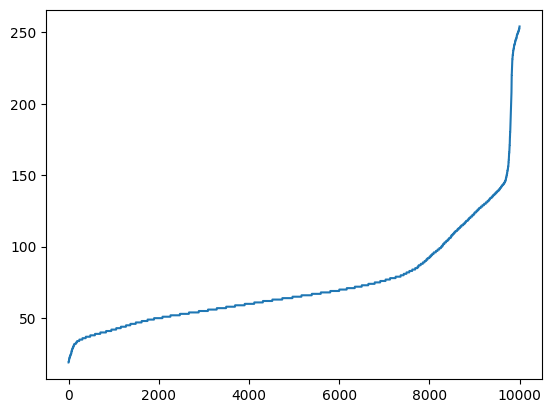

In [8]:
v = img.flatten()
x = np.sort(v)
print(x)

plt.plot(np.arange(len(x)), x)
plt.show()

### 1.6 b)

In [9]:
img = cv.resize(img, (100, 100))
H, W = img.shape
print(H, W)
cv.imshow('Fluture gray redimensionat', img)
cv.waitKey(0)
cv.destroyAllWindows()

100 100


### 1.6 c)

In [10]:
t = np.median(x)
print(t)

65.0


### 1.6 d)

In [11]:
B = img.copy()
B[B < t] = 0
B[B >= t] = 255

cv.imshow('test', B)
cv.waitKey(0)
cv.destroyAllWindows()

### 1.6 e)

In [12]:
C = img.copy()
eMediu = img.mean()
C = img - eMediu
C[C < 0] = 0
C = np.uint8(C)

cv.imshow('test', C)
cv.waitKey(0)
cv.destroyAllWindows()

### 1.6 f)

In [13]:
iMin = img.min()
print(iMin)

l, c = np.where(img == iMin)
print(l, c)

19
[76 88] [68 50]


### 1.7 a) + b)

In [14]:
dir = 'colectiiImagini/set1/'

files = os.listdir(dir)
print(files)

['im01.jpg', 'im02.jpg', 'im03.jpg', 'im04.jpg', 'im05.jpg', 'im06.jpg', 'im07.jpg', 'im08.jpg', 'im09.jpg', 'im10.jpg', 'im11.jpg', 'im12.jpg', 'im13.jpg', 'im14.jpg', 'im15.jpg', 'im16.jpg', 'im17.jpg', 'im18.jpg', 'im19.jpg', 'im20.jpg', 'im21.jpg', 'im22.jpg', 'im23.jpg', 'im24.jpg', 'im25.jpg', 'im26.jpg', 'im27.jpg', 'im28.jpg', 'im29.jpg', 'im30.jpg', 'im31.jpg', 'im32.jpg', 'im33.jpg', 'im34.jpg', 'im35.jpg', 'im36.jpg', 'im37.jpg', 'im38.jpg', 'im39.jpg', 'im40.jpg', 'im41.jpg', 'im42.jpg', 'im43.jpg', 'im44.jpg', 'im45.jpg', 'im46.jpg', 'im47.jpg', 'im48.jpg', 'im49.jpg', 'im50.jpg', 'im51.jpg', 'im52.jpg', 'im53.jpg', 'im54.jpg', 'im55.jpg', 'im56.jpg', 'im57.jpg']


In [15]:
colorImg = []
grayImg = []

for file in files:
    patch = dir + file
    img = cv.imread(patch)
    imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    grayImg.append(imgGray)
    colorImg.append(img)

colorImg = np.array(colorImg)
grayImg = np.array(grayImg)

meanColorImg = np.uint8(np.mean(colorImg, axis = 0))
meanGreyImg = np.uint8(np.mean(grayImg, axis = 0))

# print(meanColorImg)
print(meanGreyImg)

[[165 165 164 ... 166 166 166]
 [164 169 168 ... 173 169 168]
 [163 170 168 ... 173 169 168]
 ...
 [129 133 129 ... 136 135 133]
 [129 133 131 ... 136 135 133]
 [131 131 128 ... 130 132 131]]


### 1.7 c)

In [16]:
X = np.uint8(np.std(grayImg, axis=0))
cv.imshow("img deviatie standard", X)
cv.waitKey(0)
cv.destroyAllWindows()
print(X)

[[69 68 67 ... 68 67 68]
 [70 64 64 ... 60 63 66]
 [70 64 63 ... 60 64 65]
 ...
 [78 74 71 ... 72 74 78]
 [78 74 72 ... 73 74 77]
 [79 77 76 ... 79 78 81]]


### 1.7 d)

In [17]:
cv.imshow("img medie colorata", meanColorImg)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow("img medie gray", meanGreyImg)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow("img deviatie standard", X)
cv.waitKey(0)
cv.destroyAllWindows()

### 1.8

In [18]:
img = cv.imread('butterfly.jpeg')
dim = 20
print(img.shape)
H, W, channels = img.shape

y = np.random.randint(0, H - dim, size=500)
x = np.random.randint(0, W - dim, size=500)

crop = img[250:250 + dim, 250:250 + dim, :].copy()
print(crop.shape)
dist = np.zeros(500)
for i in range(0, 500):
    patch = img[y[i]:y[i] + dim, x[i]:x[i] + dim, :].copy()
    dist[i] = np.sqrt(np.sum((patch - crop)) ** 2)
# print(dist)
index = np.argmin(dist)
print("index =", str(index))

imgNew = img.copy()
imgNew[250:250 + dim, 250:250 + dim, :] = img[y[index]:y[index] + dim, x[index]:x[index] + dim, :]

cv.imshow("img veche", img)
cv.imshow("img noua", imgNew)
cv.waitKey(0)
cv.destroyAllWindows()

(670, 626, 3)
(20, 20, 3)
index = 207
